In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from source.utils import COCOParser
import pandas as pd
import re
import os

%load_ext autoreload
%autoreload 2


In [2]:
!ls

execution.json	gcp_auth  plugin		   rpc_server_cert.pem
fake_dip_home	lib	  remote-run-env-def.json


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.142 🚀 Python-3.9.14 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 14.6 GB RAM, 30.7/1003.8 GB disk)


# DL Data (subset)

In [3]:
!gcloud auth activate-service-account --key-file=/home/dataiku/gcp_auth/ai-factory-dev.json
!gsutil -m cp -r gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset .

Activated service account credentials for: [cdc-dev-dio-sac-dataiku-data@cdc-ai-factory-dev.iam.gserviceaccount.com]
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/.DS_Store...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/config.yaml...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/json_for_test/keypoints_test_information.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/.DS_Store...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/json_for_test/retrieval_test_consumer_information.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/test/000002.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/json_for_test/retrieval_test_shop_information.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/test/000079.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/test/000072.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/test/000076.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/test/000084.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/test/000075.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/test/000086.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/test/000074.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/test/000083.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/test/test/000081.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SE

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000021.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000027.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000032.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000031.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000028.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000034.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000033.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000030.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000035.json...
Copying gs://cs-dio

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000105.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000103.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000104.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000102.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000106.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000107.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000108.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000109.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000110.json...
Copying gs://cs-dio

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000179.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000182.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000181.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000180.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000184.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000185.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000186.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000188.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000187.json...
Copying gs://cs-dio

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000254.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000255.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000256.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000257.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000258.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000259.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000260.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000262.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/annos/000264.json...
Copying gs://cs-dio

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000012.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000013.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000015.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000016.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000014.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000017.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000018.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000019.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000022.jpg...
Copying gs://cs-dio

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000088.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000089.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000087.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000091.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000090.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000092.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000093.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000095.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000094.jpg...
Copying gs://cs-dio

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000173.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000175.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000174.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000176.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000177.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000178.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000180.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000179.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000181.jpg...
Copying gs://cs-dio

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000247.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000252.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000253.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000254.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000255.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000256.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000257.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000258.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/images/000259.jpg...
Copying gs://cs-dio

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000007.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000008.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000009.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000011.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000012.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000014.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000013.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000015.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000010.txt...
Copying gs://cs-dio

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000079.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000084.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000085.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000086.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000087.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000088.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000089.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000090.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000091.txt...
Copying gs://cs-dio

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000165.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000164.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000160.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000167.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000166.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000168.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000169.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000170.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000171.txt...
Copying gs://cs-dio

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000241.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000242.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000243.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000244.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000245.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000247.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000246.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000248.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000250.txt...
Copying gs://cs-dio

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000318.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000317.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000319.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/train/labels/000320.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/.DS_Store...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/annos/000003.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/annos/000001.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/annos/000004.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/annos/000002.json...
Co

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/annos/000069.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/annos/000075.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/annos/000076.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/annos/000074.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/annos/000071.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/annos/000078.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/annos/000077.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/annos/000079.json...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/valida

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000018.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000017.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000019.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000021.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000020.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000023.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000022.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000026.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/valida

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000090.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000091.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000089.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000092.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000094.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000095.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000093.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/images/000097.jpg...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/valida

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000032.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000035.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000036.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000033.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000038.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000043.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000045.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000039.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/valida

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000108.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000107.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000109.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000106.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000110.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000112.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000111.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/validation/labels/000113.txt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/Deepfashion_subset/valida

In [4]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          14998         751        4593          52        9653       13868
Swap:             0           0           0


In [105]:
for k,v in yolo_v8.model.named_modules():
    print(f"{k}")



model
model.0
model.0.conv
model.0.bn
model.0.act
model.1
model.1.conv
model.1.bn
model.2
model.2.cv1
model.2.cv1.conv
model.2.cv1.bn
model.2.cv2
model.2.cv2.conv
model.2.cv2.bn
model.2.m
model.2.m.0
model.2.m.0.cv1
model.2.m.0.cv1.conv
model.2.m.0.cv1.bn
model.2.m.0.cv2
model.2.m.0.cv2.conv
model.2.m.0.cv2.bn
model.3
model.3.conv
model.3.bn
model.4
model.4.cv1
model.4.cv1.conv
model.4.cv1.bn
model.4.cv2
model.4.cv2.conv
model.4.cv2.bn
model.4.m
model.4.m.0
model.4.m.0.cv1
model.4.m.0.cv1.conv
model.4.m.0.cv1.bn
model.4.m.0.cv2
model.4.m.0.cv2.conv
model.4.m.0.cv2.bn
model.4.m.1
model.4.m.1.cv1
model.4.m.1.cv1.conv
model.4.m.1.cv1.bn
model.4.m.1.cv2
model.4.m.1.cv2.conv
model.4.m.1.cv2.bn
model.5
model.5.conv
model.5.bn
model.6
model.6.cv1
model.6.cv1.conv
model.6.cv1.bn
model.6.cv2
model.6.cv2.conv
model.6.cv2.bn
model.6.m
model.6.m.0
model.6.m.0.cv1
model.6.m.0.cv1.conv
model.6.m.0.cv1.bn
model.6.m.0.cv2
model.6.m.0.cv2.conv
model.6.m.0.cv2.bn
model.6.m.1
model.6.m.1.cv1
model.6.m.1

# Display some images

In [9]:
DATA_PATH = '/home/dataiku/Deepfashion_subset/validation/'
annotation_file= DATA_PATH + 'instances.json'
images_dir =  DATA_PATH + 'images/'
coco= COCOParser(annotation_file, images_dir)

In [18]:
# define a list of colors for drawing bounding boxes
color_list = ["pink", "red", "teal", "blue", "orange", "yellow", "black", "magenta","green","aqua"]*10
num_imgs_to_disp = 4
total_images = len(coco.get_imgIds()) # total number of images
sel_im_idxs = np.random.permutation(total_images)[:num_imgs_to_disp]
img_ids = coco.get_imgIds()
selected_img_ids = [img_ids[i] for i in sel_im_idxs]
ann_ids = coco.get_annIds(selected_img_ids)


#im_licenses = coco.get_imgLicenses(selected_img_ids)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax = ax.ravel()
for i, im in enumerate(selected_img_ids):
    image = Image.open(f"{images_dir}{str(im).zfill(6)}.jpg")
    #print(image.size)
    ann_ids = coco.get_annIds(im)
    annotations = coco.load_anns(ann_ids)
    for ann in annotations:
        bbox = ann['bbox']
        x, y, w, h = [int(b) for b in bbox]
        class_id = ann["category_id"]
        class_name = coco.load_cats(class_id)[0]["name"]
        #license = coco.get_imgLicenses(im)[0]["name"]
        color_ = color_list[class_id]
        rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=color_, facecolor='none')
        t_box=ax[i].text(x, y, class_name,  color='red', fontsize=10)
        t_box.set_bbox(dict(boxstyle='square, pad=0',facecolor='white', alpha=0.6, edgecolor='blue'))
        ax[i].add_patch(rect)
    
    ax[i].axis('off')
    ax[i].imshow(image)
    ax[i].set_xlabel('Longitude')
    #ax[i].set_title(f"License: {license}")
plt.tight_layout()
plt.show()

(468, 624)
(400, 400)
(468, 624)
(468, 263)


# Yolo Training

In [11]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.142 🚀 Python-3.9.14 torch-2.0.1+cu117 CPU (Intel Xeon 2.00GHz)
Setup complete ✅ (4 CPUs, 14.6 GB RAM, 30.7/1003.8 GB disk)


In [6]:
#Downloading pretrained weights
!gsutil cp -r gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/pretrained_yolos .

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/pretrained_yolos/yolov5lu.pt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/pretrained_yolos/yolov5mu.pt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/pretrained_yolos/yolov5nu.pt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/pretrained_yolos/yolov5su.pt...
| [4 files][173.0 MiB/173.0 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/pretrained_yolos/yolov8l.pt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/pretrained_yolos/yolov8m.pt...
Copying gs://cs-dio-euw4-dev/dataiku/VISUAL_SEARCH_EXPLORATION/pretrained_yolos/yolov8n.pt...
Copyi

# Finetuning

In [8]:
from ultralytics import YOLO

yolo_v8 = YOLO('pretrained_yolos/yolov8n.pt')

In [9]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          14998         978        4426          52        9593       13641
Swap:             0           0           0


In [13]:
yolo_v8.train(data = 'Deepfashion_subset/config.yaml',batch =8, epochs = 20,pretrained = True,plots = True,workers = 1)

Ultralytics YOLOv8.0.142 🚀 Python-3.9.14 torch-2.0.1+cu117 CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=pretrained_yolos/yolov8n.pt, data=Deepfashion_subset/config.yaml, epochs=20, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fa


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/20         0G      1.891      3.563      2.255         24        640: 100%|██████████| 40/40 [01:25<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]
                   all        128        180        0.5      0.067     0.0385     0.0155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/20         0G      1.913      3.497      2.238         31        640: 100%|██████████| 40/40 [01:25<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]
                   all        128        180      0.492     0.0444     0.0351     0.0145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/20         0G      1.872      3.378      2.205    

In [10]:
!ls runs/detect/train2

args.yaml			 P_curve.png	   train_batch1.jpg
confusion_matrix_normalized.png  PR_curve.png	   train_batch2.jpg
confusion_matrix.png		 R_curve.png	   val_batch0_labels.jpg
F1_curve.png			 results.csv	   val_batch0_pred.jpg
labels_correlogram.jpg		 results.png	   weights
labels.jpg			 train_batch0.jpg


# Transfer Learning (freeze backbone)

In [107]:
from ultralytics import YOLO

yolo_v8 = YOLO('pretrained_yolos/yolov8n.pt')

for k,v in yolo_v8.model.named_parameters():
    print(f"{k} with size {v.size()}")

model.0.conv.weight with size torch.Size([16, 3, 3, 3])
model.0.bn.weight with size torch.Size([16])
model.0.bn.bias with size torch.Size([16])
model.1.conv.weight with size torch.Size([32, 16, 3, 3])
model.1.bn.weight with size torch.Size([32])
model.1.bn.bias with size torch.Size([32])
model.2.cv1.conv.weight with size torch.Size([32, 32, 1, 1])
model.2.cv1.bn.weight with size torch.Size([32])
model.2.cv1.bn.bias with size torch.Size([32])
model.2.cv2.conv.weight with size torch.Size([32, 48, 1, 1])
model.2.cv2.bn.weight with size torch.Size([32])
model.2.cv2.bn.bias with size torch.Size([32])
model.2.m.0.cv1.conv.weight with size torch.Size([16, 16, 3, 3])
model.2.m.0.cv1.bn.weight with size torch.Size([16])
model.2.m.0.cv1.bn.bias with size torch.Size([16])
model.2.m.0.cv2.conv.weight with size torch.Size([16, 16, 3, 3])
model.2.m.0.cv2.bn.weight with size torch.Size([16])
model.2.m.0.cv2.bn.bias with size torch.Size([16])
model.3.conv.weight with size torch.Size([64, 32, 3, 3])
mo

A quick simulator to estimate the number of parameters we freeze.

In [109]:


ss = 0
for k,v in yolo_v8.model.named_parameters():
    nn = 1
    for s in v.size():
        nn = nn*s
    ss+=nn
    
print(f"There is {ss} parameters in total")
    
freezed_p = 0
num_freeze = 22 #Number of layers we want to freeze
print(f"Freezing {num_freeze} layers")
freeze = [f'model.{x}.' for x in range(num_freeze)] + ['model.22.cv2']


# layers to freeze 
for k, v in yolo_v8.model.named_parameters(): 
    if any(x in k for x in freeze): 
        v.requires_grad = False 
        print(f'{k} freezed')
        nn = 1
        for s in v.size():
            nn = nn*s
        freezed_p+=nn

print(f"{freezed_p} parameters are freezed.")
print(f"Still have {ss - freezed_p} parameters trainable")


There is 3157200 parameters in total
Freezing 22 layers
model.0.conv.weight freezed
model.0.bn.weight freezed
model.0.bn.bias freezed
model.1.conv.weight freezed
model.1.bn.weight freezed
model.1.bn.bias freezed
model.2.cv1.conv.weight freezed
model.2.cv1.bn.weight freezed
model.2.cv1.bn.bias freezed
model.2.cv2.conv.weight freezed
model.2.cv2.bn.weight freezed
model.2.cv2.bn.bias freezed
model.2.m.0.cv1.conv.weight freezed
model.2.m.0.cv1.bn.weight freezed
model.2.m.0.cv1.bn.bias freezed
model.2.m.0.cv2.conv.weight freezed
model.2.m.0.cv2.bn.weight freezed
model.2.m.0.cv2.bn.bias freezed
model.3.conv.weight freezed
model.3.bn.weight freezed
model.3.bn.bias freezed
model.4.cv1.conv.weight freezed
model.4.cv1.bn.weight freezed
model.4.cv1.bn.bias freezed
model.4.cv2.conv.weight freezed
model.4.cv2.bn.weight freezed
model.4.cv2.bn.bias freezed
model.4.m.0.cv1.conv.weight freezed
model.4.m.0.cv1.bn.weight freezed
model.4.m.0.cv1.bn.bias freezed
model.4.m.0.cv2.conv.weight freezed
model.4.

Precise the number of layers to freeze in the following function :

In [48]:
def freeze_layer(trainer):
    model = trainer.model
    num_freeze = 22 #Number of layers we want to freeze
    print(f"Freezing {num_freeze} layers")
    freeze = [f'model.{x}.' for x in range(num_freeze)] + ['model.22.cv2'] # layers to freeze 
    for k, v in model.named_parameters(): 
        #v.requires_grad = True  # train all layers 
        if any(x in k for x in freeze): 
            print(f'freezing {k}') 
            v.requires_grad = False 
    print(f"{num_freeze} layers are freezed.")

In [59]:
freezed_yolo = YOLO('pretrained_yolos/yolov8n.pt')
freezed_yolo.add_callback("on_train_start", freeze_layer)
freezed_yolo.train(data = 'Deepfashion_subset/config.yaml',batch = 64, epochs = 5,plots = True)

Ultralytics YOLOv8.0.142 🚀 Python-3.9.14 torch-2.0.1+cu117 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=pretrained_yolos/yolov8n.pt, data=Deepfashion_subset/config.yaml, epochs=5, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fa

Freezing 22 layers
freezing model.0.conv.weight
freezing model.0.bn.weight
freezing model.0.bn.bias
freezing model.1.conv.weight
freezing model.1.bn.weight
freezing model.1.bn.bias
freezing model.2.cv1.conv.weight
freezing model.2.cv1.bn.weight
freezing model.2.cv1.bn.bias
freezing model.2.cv2.conv.weight
freezing model.2.cv2.bn.weight
freezing model.2.cv2.bn.bias
freezing model.2.m.0.cv1.conv.weight
freezing model.2.m.0.cv1.bn.weight
freezing model.2.m.0.cv1.bn.bias
freezing model.2.m.0.cv2.conv.weight
freezing model.2.m.0.cv2.bn.weight
freezing model.2.m.0.cv2.bn.bias
freezing model.3.conv.weight
freezing model.3.bn.weight
freezing model.3.bn.bias
freezing model.4.cv1.conv.weight
freezing model.4.cv1.bn.weight
freezing model.4.cv1.bn.bias
freezing model.4.cv2.conv.weight
freezing model.4.cv2.bn.weight
freezing model.4.cv2.bn.bias
freezing model.4.m.0.cv1.conv.weight
freezing model.4.m.0.cv1.bn.weight
freezing model.4.m.0.cv1.bn.bias
freezing model.4.m.0.cv2.conv.weight
freezing model

        1/5         0G      3.483       5.08      3.448        213        640: 100%|██████████| 5/5 [00:44<00:00,  8.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:14<00:00, 14.98s/it]
                   all        128        180          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        2/5         0G      3.426      5.085      3.382        205        640: 100%|██████████| 5/5 [00:41<00:00,  8.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:14<00:00, 14.44s/it]
                   all        128        180          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        3/5         0G      3.336      5.017      3.272        228        640: 100%|██████████| 5/5 [00:39<00:00,  7.85s/it]
                 

# Validation of the custom model

In [17]:
best_model_path ="runs/detect/train/weights/best.pt"
best_model  = YOLO(best_model_path)
best_model.val()

Ultralytics YOLOv8.0.142 🚀 Python-3.9.14 torch-2.0.1+cu117 CPU (Intel Xeon 2.20GHz)
YOLOv5n summary (fused): 193 layers, 2505674 parameters, 0 gradients
val: Scanning /home/dataiku/Deepfashion_subset/validation/labels.cache... 128 images, 0 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]
                   all        128        180    0.00474     0.0069    0.00258   0.000684
   short_sleeved_shirt        128         34     0.0294     0.0294     0.0158    0.00316
    long_sleeved_shirt        128         24          0          0          0          0
  long_sleeved_outwear        128          2          0          0          0          0
                  vest        128         20          0          0          0          0
                shorts        128          4          0          0          0          0
              trousers 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  4,  5,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe11e8cd430>
fitness: 0.0008727390417531379
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([ 0.00068357,   0.0031584,           0,  0.00068357,           0,           0,  0.00068357,           0,           0,   0.0043609,           0,           0,           0,           0])
names: {0: 'NaN', 1: 'short_sleeved_shirt', 2: 'long_sleeved_shirt', 3: 'short_sleeved_outwear', 4: 'long_sleeved_outwear', 5: 'vest', 6: 'sling', 7: 'shorts', 8: 'trousers', 9: 'skirt', 10: 'short_sleeved_dress', 11: 'long_sleeved_dress', 12: 'vest_dress', 13: 'sling_dress'}
plot: True
results_dict: {'metrics/precision(B)': 0.0047399124939231894, 'metrics/recall(B)': 0.006902126601169009, 'metrics/mAP50(B)': 0.0

# Display its performance

In [18]:
!ls runs/detect/train

args.yaml			 P_curve.png	   train_batch1.jpg
confusion_matrix_normalized.png  PR_curve.png	   train_batch2.jpg
confusion_matrix.png		 R_curve.png	   val_batch0_labels.jpg
F1_curve.png			 results.csv	   val_batch0_pred.jpg
labels_correlogram.jpg		 results.png	   weights
labels.jpg			 train_batch0.jpg


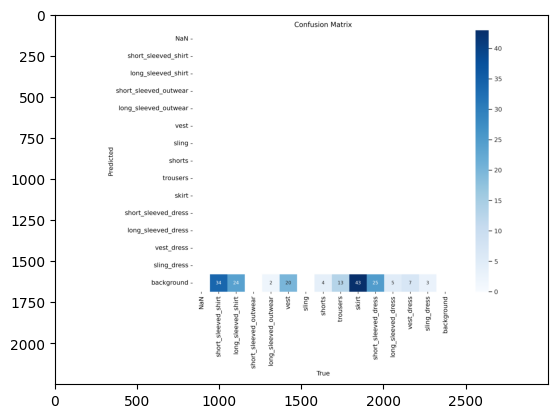

In [57]:
import matplotlib.image as mpimg
fig,ax = plt.subplots()
img = mpimg.imread('runs/detect/train3/confusion_matrix.png')
ax.imshow(img)
#plt.show()

In [20]:
img = mpimg.imread('runs/detect/train/results.png')
plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

# Inference on a 5 random images in the test set

In [21]:
best_model.predict(conf=0.25,source = 'Deepfashion_subset/validation/--',save=True,verbose = 0 )


image 1/128 /home/dataiku/Deepfashion_subset/validation/images/000001.jpg: 640x480 (no detections), 84.6ms
image 2/128 /home/dataiku/Deepfashion_subset/validation/images/000002.jpg: 640x480 (no detections), 49.6ms
image 3/128 /home/dataiku/Deepfashion_subset/validation/images/000003.jpg: 640x480 (no detections), 45.8ms
image 4/128 /home/dataiku/Deepfashion_subset/validation/images/000004.jpg: 640x480 (no detections), 42.1ms
image 5/128 /home/dataiku/Deepfashion_subset/validation/images/000005.jpg: 640x480 (no detections), 54.2ms
image 6/128 /home/dataiku/Deepfashion_subset/validation/images/000006.jpg: 640x480 (no detections), 60.0ms
image 7/128 /home/dataiku/Deepfashion_subset/validation/images/000007.jpg: 640x480 (no detections), 56.1ms
image 8/128 /home/dataiku/Deepfashion_subset/validation/images/000008.jpg: 640x384 (no detections), 62.3ms
image 9/128 /home/dataiku/Deepfashion_subset/validation/images/000009.jpg: 640x480 (no detections), 47.5ms
image 10/128 /home/dataiku/Deepfashi

image 77/128 /home/dataiku/Deepfashion_subset/validation/images/000077.jpg: 640x480 (no detections), 42.7ms
image 78/128 /home/dataiku/Deepfashion_subset/validation/images/000078.jpg: 640x480 (no detections), 38.9ms
image 79/128 /home/dataiku/Deepfashion_subset/validation/images/000079.jpg: 640x480 (no detections), 40.0ms
image 80/128 /home/dataiku/Deepfashion_subset/validation/images/000080.jpg: 640x384 (no detections), 39.6ms
image 81/128 /home/dataiku/Deepfashion_subset/validation/images/000081.jpg: 640x480 (no detections), 55.6ms
image 82/128 /home/dataiku/Deepfashion_subset/validation/images/000082.jpg: 640x480 (no detections), 40.2ms
image 83/128 /home/dataiku/Deepfashion_subset/validation/images/000083.jpg: 640x480 (no detections), 57.0ms
image 84/128 /home/dataiku/Deepfashion_subset/validation/images/000084.jpg: 640x480 (no detections), 57.1ms
image 85/128 /home/dataiku/Deepfashion_subset/validation/images/000085.jpg: 640x384 (no detections), 39.7ms
image 86/128 /home/dataiku/D

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'NaN', 1: 'short_sleeved_shirt', 2: 'long_sleeved_shirt', 3: 'short_sleeved_outwear', 4: 'long_sleeved_outwear', 5: 'vest', 6: 'sling', 7: 'shorts', 8: 'trousers', 9: 'skirt', 10: 'short_sleeved_dress', 11: 'long_sleeved_dress', 12: 'vest_dress', 13: 'sling_dress'}
 orig_img: array([[[ 73,  88, 127],
         [ 83,  98, 137],
         [ 89, 104, 143],
         ...,
         [134, 152, 159],
         [134, 152, 159],
         [134, 152, 159]],
 
        [[ 75,  90, 129],
         [ 80,  95, 134],
         [ 82,  97, 136],
         ...,
         [137, 155, 162],
         [137, 155, 162],
         [137, 155, 162]],
 
        [[ 79,  95, 132],
         [ 80,  96, 133],
         [ 77,  93, 130],
         ...,
         [141, 159, 166],
         [141, 159, 166],
         [141, 159, 166]],
 
        ...,
 
        [[134, 158, 1

runs/detect/predict/000028.jpg
runs/detect/predict/000119.jpg
runs/detect/predict/000019.jpg
runs/detect/predict/000096.jpg


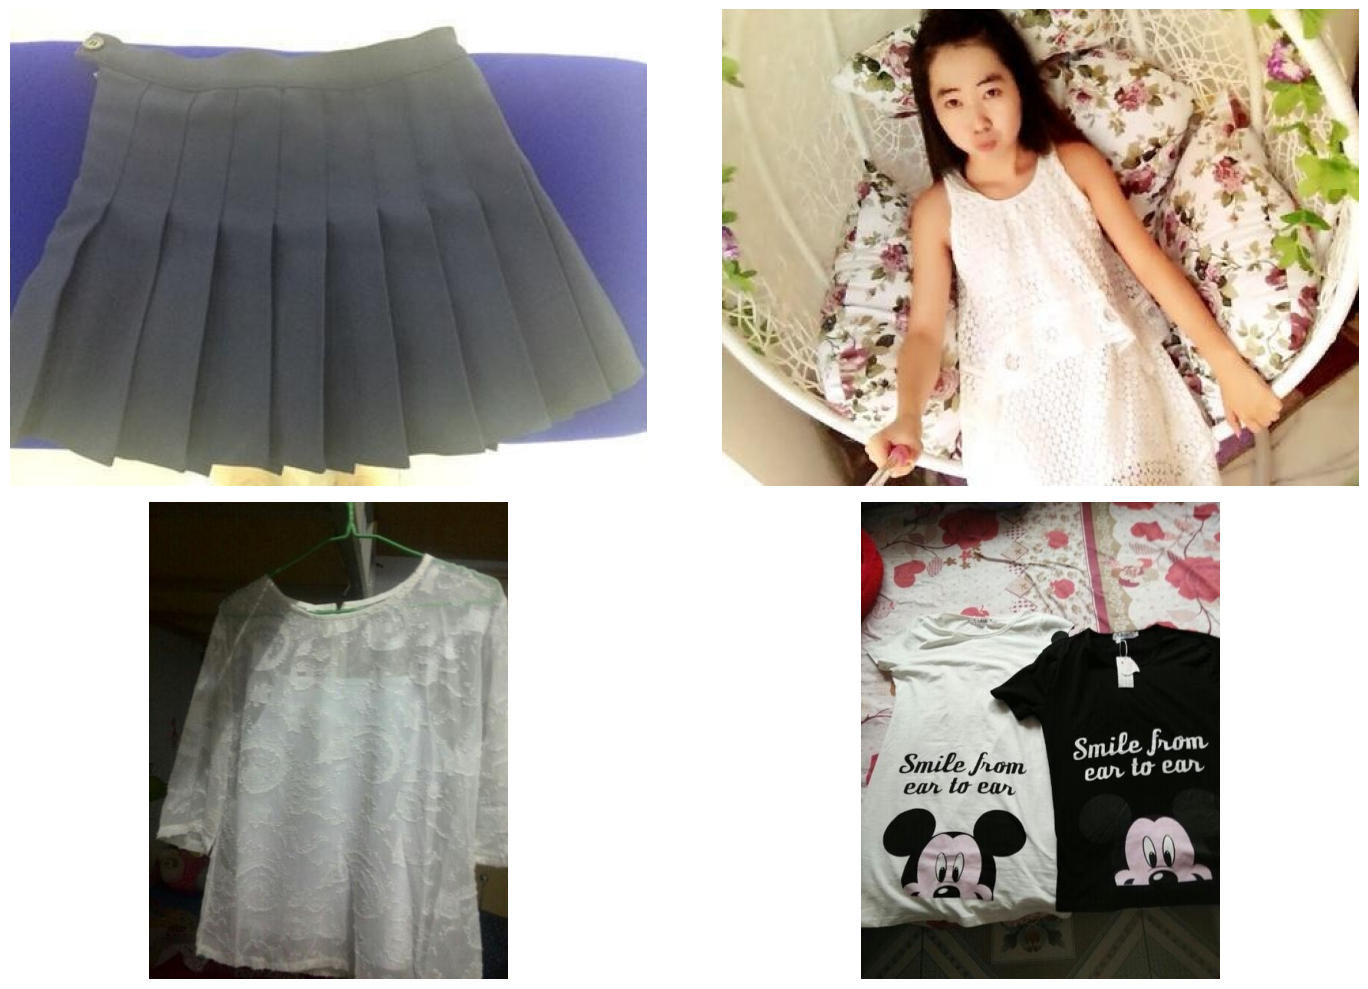

In [44]:
import glob
from PIL import Image

selected_img_predicted = glob.glob('runs/detect/predict/*.jpg')[4:8]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax = ax.ravel()

for i, im in enumerate(selected_img_predicted):
    print(im)
    image = Image.open(im)
    ax[i].axis('off')
    ax[i].imshow(image)
    
plt.tight_layout()
plt.show()
